# Machine Learning

This script contains the following:
 1. Importing libraries and data
 2. Data cleaning
 3. Data prep for regression analysis
 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Defining path
path = r'/Users/michaelyeboah/Desktop/Careerfoundry'

In [4]:
#Importing Immoscount_datasets
df_rent = pd.read_excel(os.path.join(path,'ImmoScout24B.xlsx'))

In [5]:
df_rent

,Regio 1,Service Charge,Heating Type,Telekom Tv Offer,Telekom Hybrid Upload Speed,Newly Const,Balcony,Picture count,Price trend,Telekom Upload Speed,...,Regio 2,Regio 3,Description,Facilities,Heating Costs,Energy Efficiency Class,Last Refurbish,Electricity Base Price,Electricity Kwh Price,Date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,2023-05-19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,2023-05-19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,2023-10-19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,2023-05-19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,2023-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,2023-02-20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,2023-05-19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,2023-02-20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,2023-05-19


### 2. Data cleaning

In [6]:
df_rent.columns

Index(['Regio 1', 'Service Charge', 'Heating Type', 'Telekom Tv Offer',
       'Telekom Hybrid Upload Speed', 'Newly Const', 'Balcony',
       'Picture count', 'Price trend', 'Telekom Upload Speed', 'Total Rent',
       'Year Constructed', 'Scout ID', 'No Park Spaces', 'FiringTypes',
       'Has Kitchen', 'Geo_bln', 'Cellar', 'Year Constructed Range',
       'Base Rent', 'House Number', 'Living Space', 'Geo_krs', 'Condition',
       'Interior Qual', 'Pets Allowed', 'Street', 'Street Plain', 'Lift',
       'Base Rent Range', 'Type Of Flat', 'Geo_plz', 'No Rooms',
       'Thermal Char', 'Floor', 'Number Of Floors', 'No Rooms Range', 'Garden',
       'Living Space Range', 'Regio 2', 'Regio 3', 'Description', 'Facilities',
       'Heating Costs', 'Energy Efficiency Class', 'Last Refurbish',
       'Electricity Base Price', 'Electricity Kwh Price', 'Date'],
      dtype='object')

In [11]:
df_rent.head()

,Regio 1,Service Charge,Heating Type,Telekom Tv Offer,Telekom Hybrid Upload Speed,Newly Const,Balcony,Picture count,Price trend,Telekom Upload Speed,...,Regio 2,Regio 3,Description,Facilities,Heating Costs,Energy Efficiency Class,Last Refurbish,Electricity Base Price,Electricity Kwh Price,Date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,2023-05-19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,2023-05-19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,2023-10-19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,2023-05-19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,2023-02-20


In [12]:
df_rent.shape

(268850, 49)

In [13]:
# check for missing values
df_rent.isnull().sum()

Regio 1                             0
Service Charge                   6909
Heating Type                    44856
Telekom Tv Offer                32619
Telekom Hybrid Upload Speed    223830
Newly Const                         0
Balcony                             0
Picture count                       0
Price trend                      1832
Telekom Upload Speed            33358
Total Rent                      40517
Year Constructed                57045
Scout ID                            0
No Park Spaces                 175798
FiringTypes                     56964
Has Kitchen                         0
Geo_bln                             0
Cellar                              0
Year Constructed Range          57045
Base Rent                           0
House Number                    71018
Living Space                        0
Geo_krs                             0
Condition                       68489
Interior Qual                  112665
Pets Allowed                   114573
Street      

In [15]:
# check for duplicates
dups = df_rent.duplicated()

In [16]:
dups.shape

(268850,)

## Extreme value check

<Axes: xlabel='Price trend', ylabel='Count'>

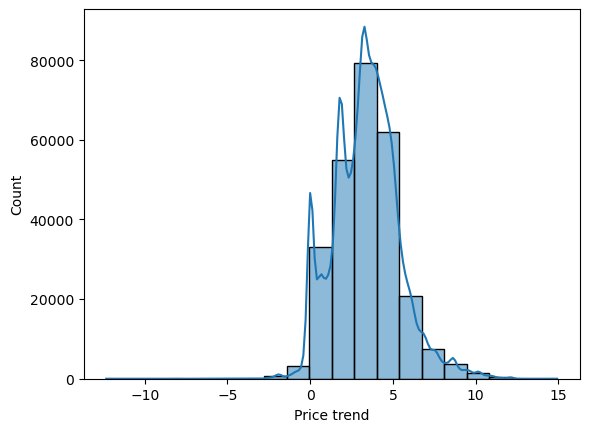

In [17]:
sns.histplot(df_rent['Price trend'], bins=20, kde = True)

In [18]:
df_rent['Price trend'].mean()#check for mean

3.389000666621726

In [20]:
df_rent['Price trend'].median() #check for median

3.39

In [21]:
df_rent['Price trend'].max() #check for max

14.92

### 3. Data prep for regression analysis

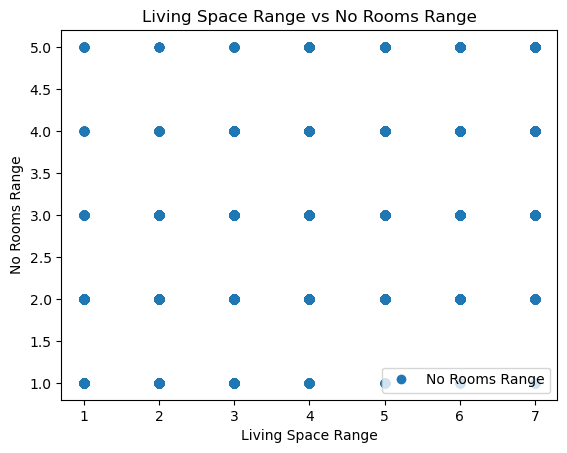

In [66]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_rent.plot(x = 'Living Space Range', y='No Rooms Range',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Living Space Range vs No Rooms Range')  
plt.xlabel('Living Space Range')  
plt.ylabel('No Rooms Range')  
plt.show()

In [67]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_rent['Living Space Range'].values.reshape(-1,1)
y = df_rent['No Rooms Range'].values.reshape(-1,1)

In [68]:
X

array([[4],
       [4],
       [4],
       ...,
       [4],
       [3],
       [3]])

In [69]:
y

array([[4],
       [3],
       [3],
       ...,
       [4],
       [2],
       [3]])

In [70]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### - Hypothesis

### Living Space Range, No Rooms Range

## 4. Regression analysis

In [71]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [72]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

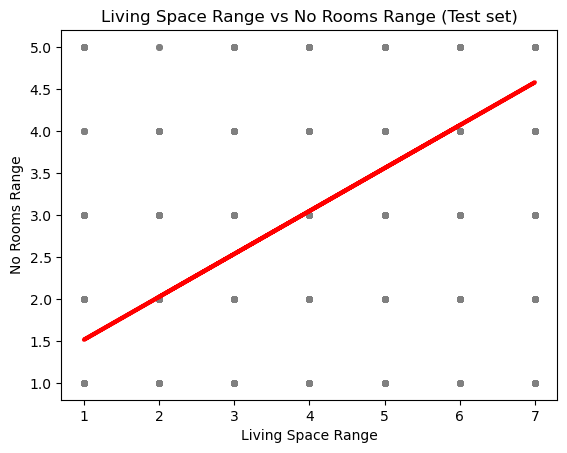

In [74]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Living Space Range vs No Rooms Range (Test set)')
plot_test.xlabel('Living Space Range')
plot_test.ylabel('No Rooms Range')
plot_test.show()

In [75]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [76]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.51068116]]
Mean squared error:  0.36522093423726526
R2 score:  0.5811976546804123


### Intepretation:

The slope is positive, so the relationship is positive. This aligns with my hypothesis that number of rooms preferred is based on the number of household and the living space. The MSE is 0.3652 , so the regression line is not at all a representation of the data. Also, the R2 score of 0.58 represents a poor fit

In [77]:
y_predicted

array([[2.0250212 ],
       [4.06774584],
       [3.04638352],
       ...,
       [2.53570236],
       [2.53570236],
       [4.06774584]])

In [78]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3,2.025021
1,4,4.067746
2,3,3.046384
3,2,2.025021
4,3,2.535702
5,3,2.535702
6,3,3.046384
7,2,1.514340
8,1,1.514340
9,2,2.025021


#### Compare how the regression fits the training set

In [79]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [80]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [81]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.51068116]]
Mean squared error:  0.3648601464768471
R2 score:  0.5863661634731812


#### Include any reflections you have on the impact of possible data bias.

The values are identical to the model.I do not see positive relationship, extremely low MSE and a low R2. This all indicates that the Living Space Range is not a good determinant of the No Rooms Range. This is true because in reality there are other important factors that would be considered in determining No Rooms Range.

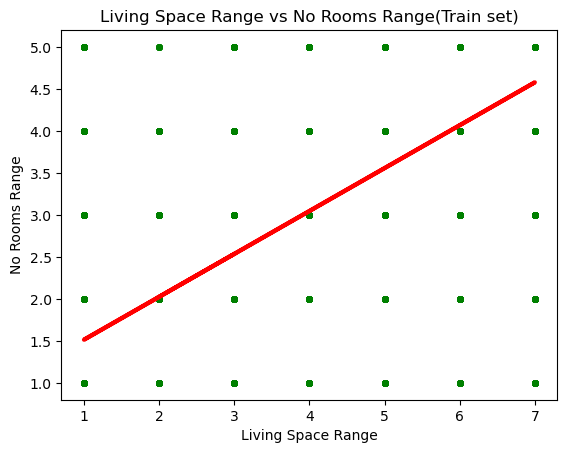

In [82]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Living Space Range vs No Rooms Range(Train set)')
plot_test.xlabel('Living Space Range')
plot_test.ylabel('No Rooms Range')
plot_test.show()

#### Bonus: performance improvement after removing outliers

In [87]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_rent[df_rent['No Rooms Range'] <=50000]

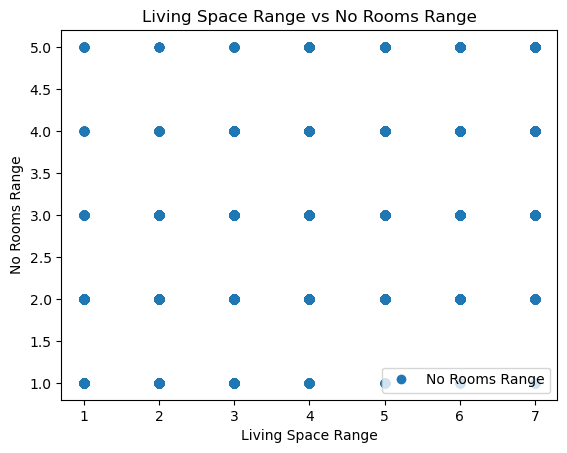

In [88]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Living Space Range', y='No Rooms Range',style='o')
plt.title('Living Space Range vs No Rooms Range')  
plt.xlabel('Living Space Range')  
plt.ylabel('No Rooms Range')
plt.show()

In [89]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df_test['Living Space Range'].values.reshape(-1,1)
y_2 = df_test['No Rooms Range'].values.reshape(-1,1)

In [90]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [91]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [92]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [93]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [94]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.51068116]]
Mean squared error:  0.36522093423726526
R2 score:  0.5811976546804123


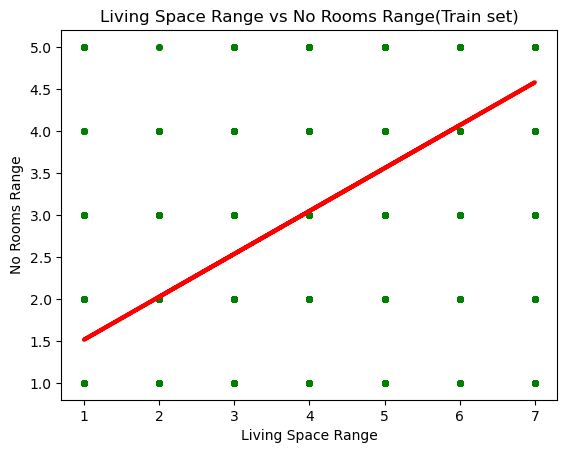

In [95]:
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='green', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Living Space Range vs No Rooms Range(Train set)')
plot_test.xlabel('Living Space Range')
plot_test.ylabel('No Rooms Range')
plot_test.show()

In [96]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,3,2.025021
1,4,4.067746
2,3,3.046384
3,2,2.025021
4,3,2.535702
5,3,2.535702
6,3,3.046384
7,2,1.514340
8,1,1.514340
9,2,2.025021
